# Ensambles de árboles



Como se mencionó anteriormente, dos de los problemas principales de lo árboles de decisión son la baja capacidad predictiva y la inestabilidad. Por lo que ese capítulo se estudian dos métodos para evitar estos problemas, en particular _boosting_ y _bagging_ con dos implementaciones clásicas como _Random Forest_ y _Gradient Boosting Machines_.

Los ensambles mejoran la capacidad predictiva y reducen la variabilidad. La idea general es agrupar múltiples modelos con el objetivo de tener un único modelo con mejor capacidad predictiva.

## _Bagging_

Uno de los grandes problemas de los árboles decisión es la varianza que tienen, por lo que parece intuitivo aplicar técnicas que permitan promediar métodos estadísticos para reducir la varianza manteniendo el sesgo bajo.

La idea de _Bagging_ es calcular $\hat{f}^1(x),\hat{f}^2(x),...,\hat{f}^B(x)$ usando B muestras boosrtapeadas y promediar las predicciones para reducir la varianza. Es decir
$$
\hat{f}_{bag}(x)=\frac{1}{B}\sum_{b=1}^{B}\hat{f}^b(x)
$$

La ventaja de utilizar _Bagging_ para predecir es que no hay que preocuparse por la profundidad de los árboles, dado que los árboles individuales tendrán mucha poco sesgo y la varianza será reducida al tomar promedios. Además, si bien _Bagging_ puede utilizarse en múltiples métodos estadísticos, es particularmente útil para árboles de decisión dado que permite reducir la varianza sin aumentar el sesgo.

_Bagging_ reduce la varianza sin aumentar el sesgo.
Partiendo de las predicciones
$$
	\hat{f}_{bag}(x)=\frac{1}{B}\sum_{b=1}^{B}\hat{f}^b(x)
$$

calcular el error viene dado por

$$
	MSE=E[(y-\hat{f}_{bag}(x))^2] = \text{Bias}^2 + \text{Varianza}+ \sigma^2
$$

ahora nos concentramos en cómo la varianza afecta al error
$$
	Var(\hat{f}_{bag}(x))=Var(\frac{1}{B}\sum_{b=1}^{B}\hat{f}^b(x))=\frac{1}{B^2}Var(\sum_{b=1}^{B}\hat{f}^b(x))
$$

asumiendo que los $\hat{f}^b(x)$ están identicamente distribuidos, se puede reescribir:

$$
	Var(\sum_{b=1}^{B}\hat{f}^b(x))=\sum_{b=1}^B Var(\hat{f}^b(x)) + \sum_{i=1}^B\sum_{j\neq i}^B cov(\hat{f}^i(x), \hat{f}^j(x))
$$

ahora asumiendo varianzas iguales ($Var(\hat{f}^b(x))=\sigma^2$) y correlaciones identicas ($\rho$) para cada par de árboles:

$$
	Var(\sum_{b=1}^{B}\hat{f}^b(x))=B\sigma^2 + B(B-1)\rho\sigma^{2}
$$

volviendo a la varianza total:
$$
\begin{aligned}
		Var(\hat{f}_{bag}(x)) &= \frac{1}{B^2}(B\sigma^{2}+B(B-1)\rho\sigma^{2}) \\
		&= \sigma^{2}(\frac{1}{B}+\frac{\rho B(B-1)}{B^2})
\end{aligned}
$$

Por lo tanto:
	
- Cuando $B \to \infty$, $\frac{1}{B} \to 0$ y la varianza se aproxima a $\rho\sigma^2$
- La reducción de varianza depende tanto de $B$ como de $\rho$
- Como $\rho < 1$, la varianza final ($\rho\sigma^2$) es menor que la varianza original ($\sigma^2$)

_Bagging_ tiene una forma muy natural de calcular el error, básicamente se basa en el hecho de que cuando se hace un muestra _boostrap_ solamente se toma en cuenta aproximadamente el 63\% de los datos.

Para probar que _Bootstrap_ solo ve aproximadamente 2/3 de los datos, partimos de la probabilidad de No ser seleccionado en una muestra:
$$
P(\text{No ser seleccionado en una muestra}) = 1-\frac{1}{n}
$$
	
Luego, como se toman $n$ muestras con reemplazo, la probabilidad de no ser seleccionado ninguna muestra
$$
P(\text{No ser seleccionado en ninguna muestra}) = (1-\frac{1}{n})^{n}
$$
	
cuando $n\rightarrow \infty$:
	
$$
\lim_{n\rightarrow \infty}(1-\frac{1}{n})^{n} = \frac{1}{e}\approx 0.368
$$
	

- La probabilidad de ser seleccionado al menos una vez es $1-\frac{1}{e} \approx 0.632$
- Aproximadamente el 63.2\% de las observaciones serán incluidas en cada muestra bootstrap
- El restante 36.8\% de las observaciones quedan fuera de la muestra (out-of-bag)

Este resultado permite estimar el error usando las observaciones _out-of-bag_ como muestra de testeo. Con un $B$ suficientemente grande, este error es asintóticamente equivalente a _leave-one-out cross validation_, lo cual es particularmente útil cuando se cuenta con una muestra grande donde el _cross validation_ tradicional sería computacionalmente costoso.

MOSTRAR GRAFICO QUE REFLEJE ESTO.

Una de las limitaciones de _Bagging_ es que, al utilizar todas las variables independientes en cada árbol del modelo, puede no reducir significativamente la varianza cuando estas variables están altamente correlacionadas. Esto se debe a que los árboles generados tienden a ser similares, lo que limita el beneficio del promediado de las predicciones. Este punto puede verse en la demostración anterior, donde a menor $\rho$ menor es el error.

### Random Forest

_Random Forest_ propone una mejora con respecto a _Bagging_ al tener en cuenta solo un sub-conjunto de las covariables para cada _split_. Esto permite que los árboles sean distintos entre ellos, haciendo que los árboles estén menos correlacionados entre ellos y por lo tanto reduciendo más el error.

El parámetro que define la cantidad de variables que se tiene cuenta en cada _split_ se denomina $m$. Cabe destacar que un _Random Forest_ con $m=p$, siendo $p$ la cantidad de covariables, es _bagging_. Por lo que _Random Forest_ puede considerarse un caso particular de _bagging_.

Mas formalmente se puede pensar el predictor _Random Forest_ como

$$
\hat{f}_{\text{rf}}(x)=\frac{1}{B}\sum_{b=1}^{B}T(x;\Theta_b)
$$

Donde \( T(x; \Theta_b) \) representa el valor predicho por el \( b \)-ésimo árbol de decisión para una observación \( x \), construido a partir de una muestra _bootstrap_ y parámetros aleatorios \( \Theta_b \).

Es interesante notar que, si tomamos si $B\rightarrow\infty$, es decir cuando se promedian muchos árboles, por Ley de los Grandes Números se puede probar que:

$$
\lim_{B\rightarrow\infty}\hat{f}_{\text{rf}}(x)=\mathit{E}[T(x;\Theta_b)]
$$
Esto significa que, con suficientes árboles, la predicción de _Random Forest_ se aproxima al valor esperado de un único árbol. La demostración formal y los detalles pueden verse en CITAR RF, sin embargo de manera intuitiva puede verse en la figura @fig-rf-predictions como a medida que aumenta la cantidad de árboles la variabilidad de las predicciones disminuye.


In [4]:

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import tqdm

np.random.seed(73815)
n = 1000

# Generate all X features at once
X = np.random.uniform(0, 1, (n, 10))
X_cols = [f'X_{i+1}' for i in range(10)]

# Calculate y using vectorized operations where possible
y = (X[:, 0]**2 + np.sin(X[:, 1]) - np.exp(X[:, 2]) + np.log1p(X[:, 3]) + 
     X[:, 4]*X[:, 5] + X[:, 6]*X[:, 7]*X[:, 8] - np.sqrt(X[:, 9]) + 
     X[:, 0]*X[:, 1] - X[:, 2]*X[:, 3] + X[:, 4]*X[:, 5]*X[:, 6] +
     np.random.normal(0, 0.1, n))

# Create DataFrame with all columns
df = pd.DataFrame(X, columns=X_cols)
df['y'] = y

from sklearn.model_selection import train_test_split
X = df.drop(columns='y')

y = df['y']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#| label: set-up

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import tqdm

# Fetch the abalone dataset
abalone = fetch_ucirepo(id=1)

# Prepare features and targets: drop the 'Sex' column and ensure y is 1D.
X = abalone.data.features.drop('Sex', axis=1)
# Convert y to a 1D array (using .values.ravel() or .squeeze())
y = abalone.data.targets.values.ravel() if hasattr(abalone.data.targets, 'values') else abalone.data.targets.squeeze()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
#| label: calc-rf-predictions

def get_predictions_for_different_M(X_train, y_train, X_test_point, max_trees=100):
    """
    Trains a RandomForestRegressor with an increasing number of trees and
    records the prediction for a given test point.
    
    Parameters:
        X_train (array-like): Training features, shape (n_samples, n_features).
        y_train (array-like): Training targets, shape (n_samples,).
        X_test_point (array-like): A single test point with multiple features,
                                   shape (n_features,) or (1, n_features).
        max_trees (int): The maximum number of trees to try.
        
    Returns:
        tree_numbers (np.array): Array of tree counts used.
        predictions (np.array): Array of predictions corresponding to each model.
    """
    predictions = []
    tree_numbers = []
    
    # If X_train is a DataFrame, ensure X_test_point is also a DataFrame with the same columns.
    if hasattr(X_train, 'columns'):
        # If X_test_point is a Series, convert it to a DataFrame with one row.
        if isinstance(X_test_point, pd.Series):
            X_test_point = X_test_point.to_frame().T
        # If X_test_point is a NumPy array, convert it to a DataFrame.
        elif isinstance(X_test_point, np.ndarray):
            X_test_point = pd.DataFrame(X_test_point, columns=X_train.columns)
    else:
        # Otherwise, ensure X_test_point is 2D.
        X_test_point = np.atleast_2d(X_test_point)
    
    # Loop over a range of tree counts (stepping by 10)
    for n_trees in tqdm.tqdm(range(1, max_trees + 1, 10), desc="Calculando predicciones"):
        # Create and train the Random Forest model with n_trees trees
        rf = RandomForestRegressor(n_estimators=n_trees, random_state=42)
        rf.fit(X_train, y_train)
        
        # Predict for the test point
        pred = rf.predict(X_test_point)[0]
        
        predictions.append(pred)
        tree_numbers.append(n_trees)
    
    return np.array(tree_numbers), np.array(predictions)

# Select a single test point.
# Using iloc with [0:1] ensures the result is a DataFrame (preserving column names).
test_point = X_test.iloc[0:1]

# Get predictions for different numbers of trees
trees, preds = get_predictions_for_different_M(X_train, y_train, test_point, max_trees=1000)

# Calculate the running standard deviation of the predictions
running_std = []
for i in range(1, len(preds)):
    running_std.append(np.std(preds[:i]))


Calculando predicciones: 100%|██████████| 100/100 [01:57<00:00,  1.18s/it]


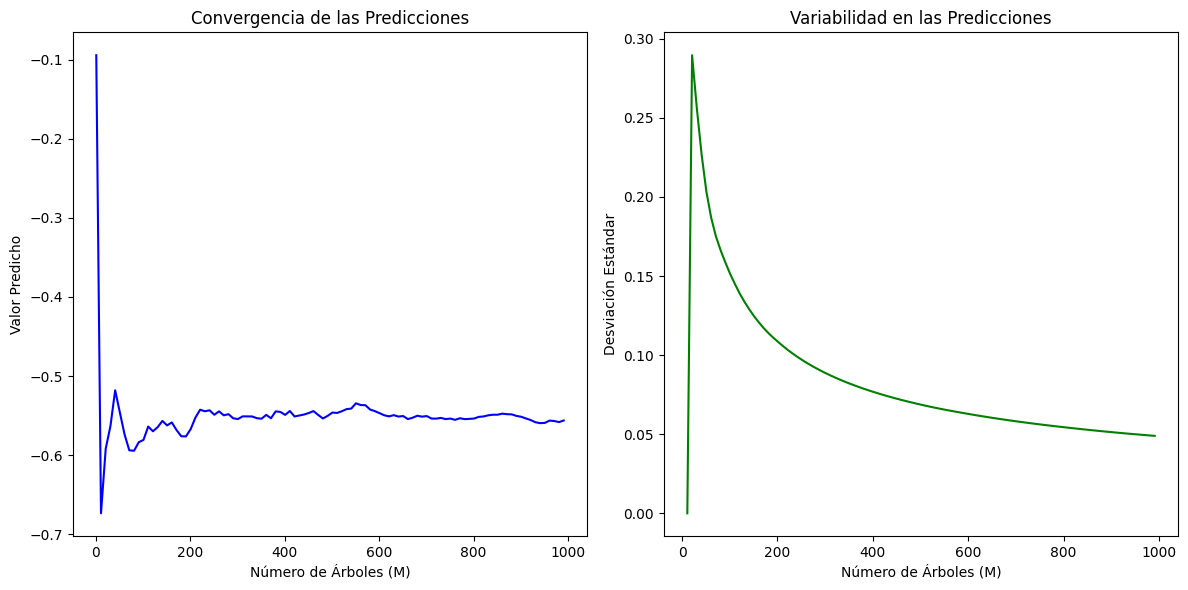

In [6]:
#| label: fig-rf-predictions

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot: Prediction vs. Number of Trees
sns.lineplot(x=trees, y=preds, ax=ax1, color='blue')
ax1.set_xlabel('Número de Árboles (M)')
ax1.set_ylabel('Valor Predicho')
ax1.set_title('Convergencia de las Predicciones')

# Plot: Running Standard Deviation vs. Number of Trees
sns.lineplot(x=trees[1:], y=running_std, ax=ax2, color='green')
ax2.set_xlabel('Número de Árboles (M)')
ax2.set_ylabel('Desviación Estándar')
ax2.set_title('Variabilidad en las Predicciones')

plt.tight_layout()
plt.show()

## Boosting

A diferencia de _Bagging_, _Boosting_ no promedia predicciones, sino que construye un modelo iterativamente. Donde cada modelo se construye con el objetivo de corregir el error cometido por el modelo anterior. A continuación se presenta un ejemplo de cómo funciona el algoritmo de _Gradient Boosting Machines (GBM)_ propuesto por @friedman_2001.

Como en cualquier problema de aprendizaje supervisado, el objetivo es estimar $\hat{f}(x)$ a partir de un conjunto de datos $(X,Y)$. En este caso, el conjunto de datos es una muestra i.i.d. de $(X,Y)$ de tamaño $n$:

$$
(X,Y)=\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}
$$

Donde $x_i$ es un vector de covariables y $y_i$ es la variable de respuesta, en este caso, continua. Por lo que se trata de un problema de regresión.

El algoritmo de _Gradient Boosting Machines_ propone un método para encontrar un aproximación de la función $f(x)$ que minimiza una función de pérdida $L(y,f(x))$:

$$
\hat{f}(x)=\arg\min_{f}\frac{1}{n}\sum_{i=1}^{n}L(y_i,f(x_i))
$$

En definitiva, se ve que la forma de aproximar la función $f(x)$ es a través de una combinación lineal de modelos base $h(x,\theta)$:

$$
\hat{f}(x)=\sum_{b=1}^{B}\gamma_b h_b(x,\theta_b)
$$





### Algoritmo {.unnumbered}

El algoritmo de _Gradient Boosting Machines_ requiere un conjunto de datos $(X,Y)$, una función de pérdida $L(y,f(x))$, un número de iteraciones $B$ y un modelo base $h(x,\theta)$. Con esto, el algoritmo es el siguiente:

1. Inicializar $\hat{f}_0(x)$ con una constante
2. Para cada iteración $b=1,2,...,B$:
    - Calcular el gradiente de la función de pérdida y utilizar su valor negativo.
    - Ajustar el modelo base $h_b(x,\theta_b)$ a los datos $(X,g_b(X))$
    - Encontrar el mejor gradiente descend step-size $\gamma_b$:
    $$
    \gamma_b=\arg\min_{\gamma}\sum_{i=1}^{n}L(y_i,\hat{f}_{b-1}(x_i)+\gamma h_b(x_i,\theta_b))
    $$
    - Actualizar la aproximación:
    $$
    \hat{f}_b(x)=\hat{f}_{b-1}(x)+\gamma_b h_b(x,\theta_b)
    $$
    
3. Devolver el modelo final

### Funciones de pérdida

Dependiendo el problema y los datos con los que se esté trabajando, se pueden utilizar distintas funciones de pérdida. A continuación se presentan algunas de las más comunes para problemas de regresión. Es decir, cuando la variable de respuesta $(y)$ es continua.

#### Error Cuadrático Medio (MSE)

Una de las funciones de pérdida más comunes es el error cuadrático medio (MSE), que se define como:
$$
L(y,f(x))=\frac{1}{2}(y-f(x))^2
$$

Una de las ventajas que tienen este tipo de funciones de pérdida es que son diferenciables, lo cual facilita el cálculo del gradiente. Que simplemente es:
$$
\begin{aligned} 
\frac{\partial L(y,f(x))}{\partial f(x)}&=\frac{\partial}{\partial f(x)}\frac{1}{2}(y-f(x))^2\\
&=\frac{1}{2}2(y-f(x))\frac{\partial(y-f(x))}{\partial f(x)}\\
&=-(y-f(x)) = F(x)-y
\end{aligned}
$$

Luego, como el gradiente indica la dirección de máximo crecimiento, el negativo del gradiente indica la dirección de máximo decrecimiento. Lo cual es lo que se busca en el algoritmo de _boosting_, es decir, minimizar la función de pérdida. Por lo que el gradiente de la función de pérdida es:
$$
- g_b(x)=y-F(x)
$$

Lo cual es simplemente el residuo.


#### Alternativas robustas

Como se mencionó anteriormente, una de las ventajas de utilizar la función de pérdida MSE es que es diferenciable. Sin embargo, el hecho de que penalice los errores grandes puede ser una desventaja cuando se trabaja con _outliers_. Por lo que también se puede utilizar la función de pérdida absoluta (MAE) que se define como:
$$
L(y,f(x))=|y-f(x)|
$$

ó la función de pérdida Huber que se define como:
$$
L(y,f(x))=\begin{cases}
    (y-f(x))^2 & \text{si } |y-f(x)|\leq\delta \\
    2\delta|y-f(x)|-2\delta^2 & \text{si } |y-f(x)|>\delta
\end{cases}
$$

A continuación, en la @fig-loss-functions,  se presentan las funciones de pérdida anteriores. Puede verse que MSE aumenta mucho cuando hay errores grandes, mientras que MAE y Huber son más robustas a los outliers. Además, Huber se comporta similar a MSE cuando el error es pequeño, pero al aumentar el error, comienza a penalizar menos.

In [7]:
#| label: calc-loss-functions

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample predictions and true values
y_true = 0
predictions = np.linspace(-4, 4, 1000)

# Calculate different loss functions
mse_loss = 0.5 * (predictions - y_true)**2
mae_loss = np.abs(predictions - y_true)

# Calculate Huber loss for different deltas
delta_values = [1.0, 0.5, 0.25]
huber_losses = []
for delta in delta_values:
    huber_loss = np.where(np.abs(predictions - y_true) <= delta,
                         0.5 * (predictions - y_true)**2,
                         delta * np.abs(predictions - y_true) - 0.5 * delta**2)
    huber_losses.append(huber_loss)


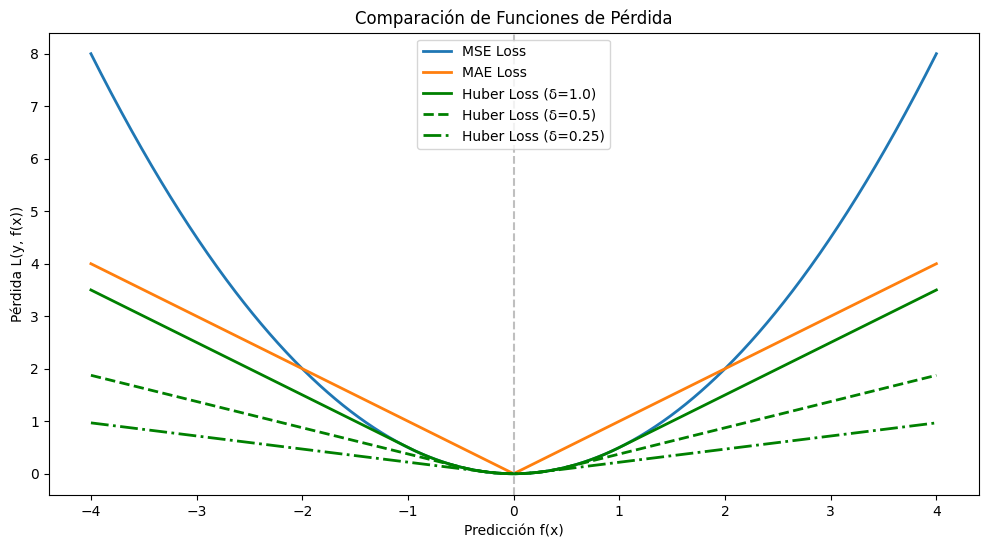

In [8]:
#| label: fig-loss-functions
#| include: true

plt.figure(figsize=(12, 6))

# Plot the loss functions
sns.lineplot(x=predictions, y=mse_loss, label='MSE Loss', linewidth=2)
sns.lineplot(x=predictions, y=mae_loss, label='MAE Loss', linewidth=2)
# Plot all Huber losses
linestyles = ['-', '--', '-.']
for (delta, huber_loss), ls in zip(zip(delta_values, huber_losses), linestyles):
    sns.lineplot(x=predictions, y=huber_loss, label=f'Huber Loss (δ={delta})', 
                linewidth=2, linestyle=ls, color='green')

# Add vertical line at y_true
plt.axvline(x=y_true, color='gray', linestyle='--', alpha=0.5)

# Customize the plot
plt.xlabel('Predicción f(x)')
plt.ylabel('Pérdida L(y, f(x))')
plt.title('Comparación de Funciones de Pérdida')
plt.legend()

# Show the plot
plt.show()


### Modelos base

Si bien el algoritmo de _Boosting_ puede utilizar múltiples modelos base, en este trabajo se expondrán únicamente los modelos base de árboles de decisión.

Como se mencionó anteriormente, una de las ventajas de los árboles de decisión es poder capturar interacciones entre las covariables. Esta característica puede ser regulada mediante un hiperparámetro que indica la profundidad máxima de los árboles. En particular, la literatura sugiere utilizar árboles de poca profundidad en este tipo de modelos. Siendo los _stumps_ los árboles de profundidad 1 los más utilizados.

En la @fig-gbm-depth se puede ver el efecto de la profundidad de los árboles en el error del modelo. Puede verse que a medida que aumenta la profundidad del árbol, el error disminuye hasta llegar a aproximadamente 10, luego de lo cual el error se estabiliza.

In [9]:
#| label: gbm-depth

# Demonstrate the effect of tree depth in GBM
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Generate some sample data
np.random.seed(42)

# Test different max_depths
depths = [i for i in range(1,20)]
n_estimators = 100
learning_rate = 0.1

mse_scores = []
for d in tqdm.tqdm(depths, desc="Calculating errors for different depths"):
    gbm = GradientBoostingRegressor(
        max_depth=d,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)


Calculating errors for different depths: 100%|██████████| 19/19 [00:05<00:00,  3.44it/s]


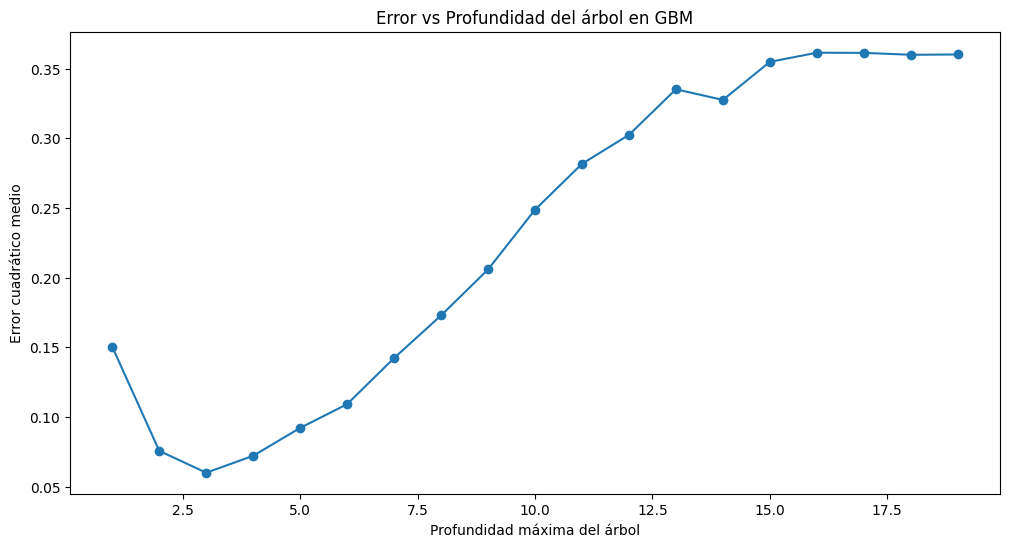

In [10]:
#| label: fig-gbm-depth
#| include: true

import matplotlib.pyplot as plt

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(depths, mse_scores, marker='o')
plt.xlabel('Profundidad máxima del árbol')
plt.ylabel('Error cuadrático medio')
plt.title('Error vs Profundidad del árbol en GBM')
plt.show()


### Regularización

Uno de los principales problemas de los modelos de aprendizaje automático es el sobreajuste. Es decir, que el modelo se ajuste demasiado a los datos de entrenamiento y por lo tanto no generalice bien a nuevos datos. Esto se da porque las funciones que se utilizan son muy flexibles y pueden llegar a ajustarse al conjunto de datos, por lo que existen determinadas técnicas para evitar esto. En este trabajo, se estudiarán tres técnicas: _subsampling_, _shrinkage_ y _early stopping_.

#### _Subsampling_

La idea intuitiva detrás del _subsampling_ es introducir variabilidad en el entrenamiento del modelo. Esto se logra al considerar un subconjunto de las observaciones para cada iteración del algoritmo. El sampleo puede ser con o sin reemplazo. Cabe aclarar que para definir la proporción de la muestra que se utiliza, se utiliza el hyperparámetro _bag fraction_ que toma valores entre 0 y 1. Por ejemplo, si se tiene una muestra de 1000 observaciones y se utiliza un _bag fraction_ de 0.1, se utilizarán 100 observaciones para cada iteración.

Pese a que esta técnica puede ayudar a en casos donde los _datasets_ sean muy grandes y el costo computacional sea alto, al solo considerar una parte de las observaciones el entrenamiento puede ser menos preciso por lo que se debe balancear.

#### Shrinkage

_Shrinkage_ se utiliza para reducir el efecto de los árboles individuales en el modelo. Intuitivamente, es un hiperparámetro que permite regular cuánto se toman en cuenta los errores de los árboles anteriores y se basa en que es preferible mejorar poco a poco las predicciones.

En definitiva, el shrinkage puede incluirse $\hat{f}_b(x)$ como:
$$
\hat{f}_b(x)=\hat{f}_{b-1}(x)+\lambda\gamma_b h_b(x,\theta_b)
$$

Donde $\lambda$ es el _shrinkage_ que toma valores entre 0 y 1. Lógicamente, a medida que $\lambda$ se acerca a 0, los incrementos de las predicciones son cada vez más pequeños y por lo tanto el modelo es menos sensible a los errores de los árboles anteriores, alcanzando así una mejor generalización. Además, al elegir un _shrinkage_ pequeño, el modelo converge más lento, por lo cual se necesita un mayor número de iteraciones $B$para que el modelo converja al mismo error.

En la @fig-shrinkage se puede ver el efecto del shrinkage en el error del modelo tanto en la muestra de entrenamiento como en la muestra de test. Puede verse que en la muestra de entrenamiento el error disminuye más rápido a medida que aumenta el shrinkage. Sin embargo, en la muestra de testeo puede verse como el _shrinkage_ afecta tanto la velocidad de convergencia como la capacidad de generalización del modelo.

In [20]:
#| label: calc-shrinkage

# Definimos diferentes valores de shrinkage para comparar
shrinkage_values = [1.0, 0.5, 0.1, 0.05]
n_estimators = 250
max_depth = 3

# Entrenamos modelos con diferentes valores de shrinkage
models = []
train_scores = []
test_scores = []

for shrinkage in shrinkage_values:
    gbm = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=shrinkage,
        random_state=42
    )
    
    # Guardamos el error en cada iteración
    train_score = []
    test_score = []
    
    for i in tqdm.tqdm(range(1, n_estimators + 1, 100), desc=f"Training model with shrinkage {shrinkage}"):
        gbm.set_params(n_estimators=i)
        gbm.fit(X_train, y_train)
        train_score.append(mean_squared_error(y_train, gbm.predict(X_train)))
        test_score.append(mean_squared_error(y_test, gbm.predict(X_test)))
    
    train_scores.append(train_score)
    test_scores.append(test_score)


Training model with shrinkage 0.05: 100%|██████████| 3/3 [00:00<00:00,  7.02it/s]


In [21]:
import pandas as pd

iterations = range(1, n_estimators + 1, 100)

# Create long format DataFrame for train scores
train_data = []
for i, shrinkage in enumerate(shrinkage_values):
    for iter_num, score in zip(iterations, train_scores[i]):
        train_data.append({
            'n_estimators': iter_num,
            'shrinkage': shrinkage,
            'mse': score,
            'set': 'train'
        })

# Create long format DataFrame for test scores        
test_data = []
for i, shrinkage in enumerate(shrinkage_values):
    for iter_num, score in zip(iterations, test_scores[i]):
        test_data.append({
            'n_estimators': iter_num,
            'shrinkage': shrinkage,
            'mse': score,
            'set': 'test'
        })


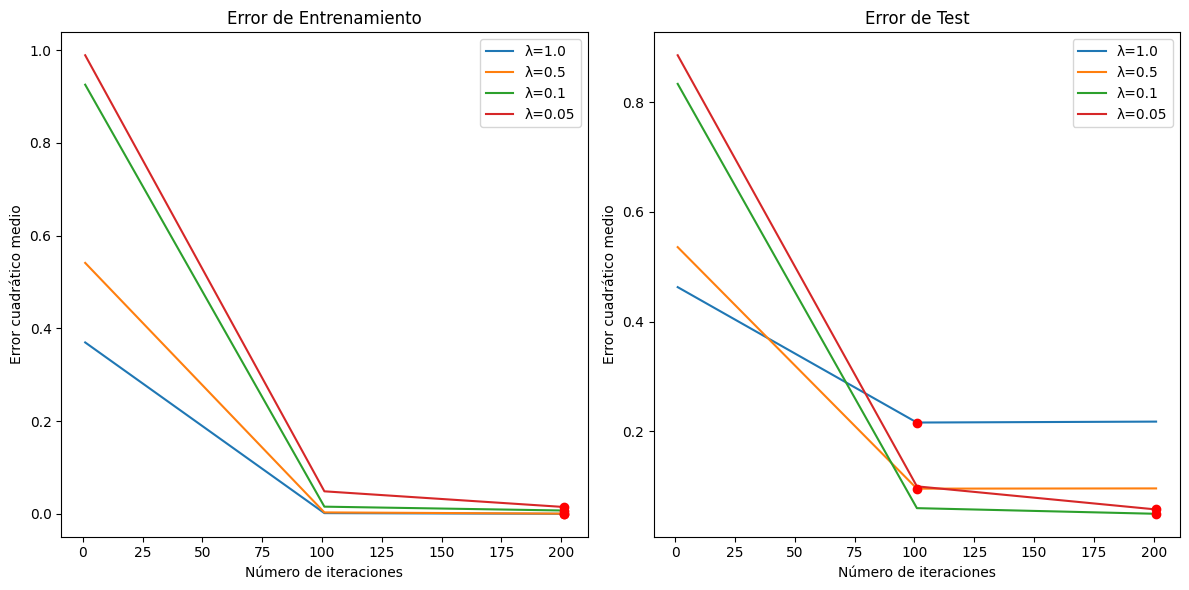

In [22]:
#| label: fig-shrinkage
#| include: true

# Combine train and test data
all_data = pd.DataFrame(train_data + test_data)

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot train data
for shrinkage in shrinkage_values:
    subset = all_data[all_data['shrinkage'] == shrinkage]
    train = subset[subset['set'] == 'train']
    ax1.plot(train['n_estimators'], train['mse'],
             label=f'λ={shrinkage}')
    # Add point at minimum
    min_score = train['mse'].min()
    min_idx = train.loc[train['mse'].idxmin(), 'n_estimators']
    ax1.scatter(min_idx, min_score, color='red', zorder=5)

ax1.set_xlabel('Número de iteraciones')
ax1.set_ylabel('Error cuadrático medio')
ax1.set_title('Error de Entrenamiento')
ax1.legend()

# Plot test data
for shrinkage in shrinkage_values:
    subset = all_data[all_data['shrinkage'] == shrinkage]
    test = subset[subset['set'] == 'test']
    ax2.plot(test['n_estimators'], test['mse'],
             label=f'λ={shrinkage}')
    # Add point at minimum
    min_score = test['mse'].min()
    min_idx = test.loc[test['mse'].idxmin(), 'n_estimators']
    ax2.scatter(min_idx, min_score, color='red', zorder=5)

ax2.set_xlabel('Número de iteraciones')
ax2.set_ylabel('Error cuadrático medio')
ax2.set_title('Error de Test')
ax2.legend()

plt.tight_layout()
plt.show()


#### _Early Stopping_

Puede verse también en la @fig-shrinkage que el modelo converge a un error mínimo. Sin embargo, puede ser que el modelo se sobreajuste a los datos de entrenamiento y por lo tanto no generalice bien a nuevos datos. Para evitar esto, se puede utilizar el _early stopping_ que consiste en detener el entrenamiento cuando el error en la muestra de test deja de disminuir o lo hace de manera muy lenta.

De esta forma, se puede evitar el sobreajuste y reducir el tiempo de entrenamiento de estos modelos. Esto último es particularmente útil cuando se trabaja con muestras grandes.